In [11]:
import cv2
import glob
import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [10]:
devices = tf.config.experimental.list_physical_devices('GPU')

try: 
    tf.config.experimental.set_memory_growth(devices[0], True)
except:
    print('No GPU detected')

Number of available GPU: 1


In [12]:
validation_data_path = r'.\Pneumonia\val'
model_weigths_path = r'.\log_weights'

In [13]:
images_normal = glob.glob(validation_data_path + r'\NORMAL\*.*')
images_pneumonia = glob.glob(validation_data_path + r'\PNEUMONIA\*.*')

In [14]:
def preprocessData(ifiles, label):
    image_list = []
    label_list = []
    for file in tqdm.tqdm(ifiles):
        image = cv2.imread(file)
        image = cv2.resize(image, (200, 200))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image.astype('float32') / 255
        image_list.append(image)
        label_list.append(label)
    return image_list, label_list

In [15]:
images, labels = preprocessData(images_normal, 0)
images_, labels_ = preprocessData(images_pneumonia, 1)

images.extend(images_)
labels.extend(labels_)

100%|██████████| 308/308 [00:04<00:00, 75.02it/s]


In [16]:
model_xception_cv = tf.keras.models.load_model(model_weigths_path + r'\model_opencv.h5')

results = []
for img in tqdm.tqdm(images):
    results.append(model_xception_cv.predict(np.expand_dims(img, axis=0)))

100%|██████████| 616/616 [00:38<00:00, 16.17it/s]


In [51]:
results = np.array(results).reshape(-1)
results = np.array([round(x) for x in results])
labels = np.array(labels)

In [55]:
print(classification_report(labels, results))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       308
           1       0.95      0.93      0.94       308

    accuracy                           0.94       616
   macro avg       0.94      0.94      0.94       616
weighted avg       0.94      0.94      0.94       616



In [56]:
print(f'Xception model accuracy: {accuracy_score(labels, results)}')

Xception model accuracy: 0.939935064935065


<AxesSubplot:title={'center':'Confusion matrix'}>

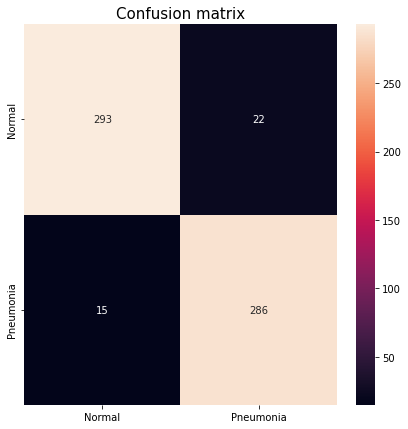

In [57]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.set_title('Confusion matrix', size=15)
sns.heatmap(confusion_matrix(results, labels), ax=ax, fmt='g', annot=True,
               xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])

<AxesSubplot:title={'center':'Training time'}, xlabel='Epochs', ylabel='Seconds'>

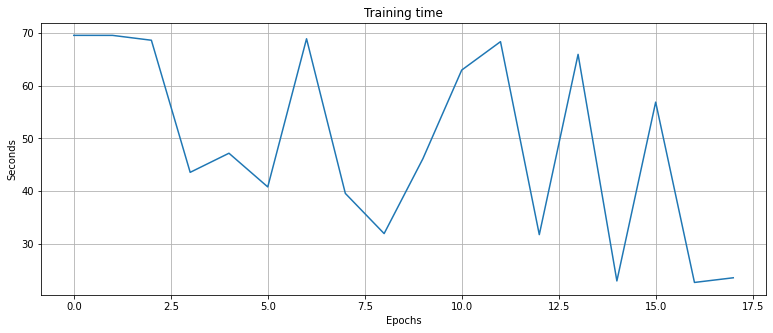

In [58]:
path_to_log_files = r'C:\Users\Athenda\Desktop\Python\KDNuggets 20\Pneumonia chest X_Ray'
log_duration = pd.read_csv(path_to_log_files + r'\log_duration\OpenCV_duration_log.csv')

fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(111)
ax.set_title('Training time')
ax.set_ylabel('Seconds')
ax.set_xlabel('Epochs')
ax.grid(True)
sns.lineplot(x='epochs', y='duration', data=log_duration, ax=ax)

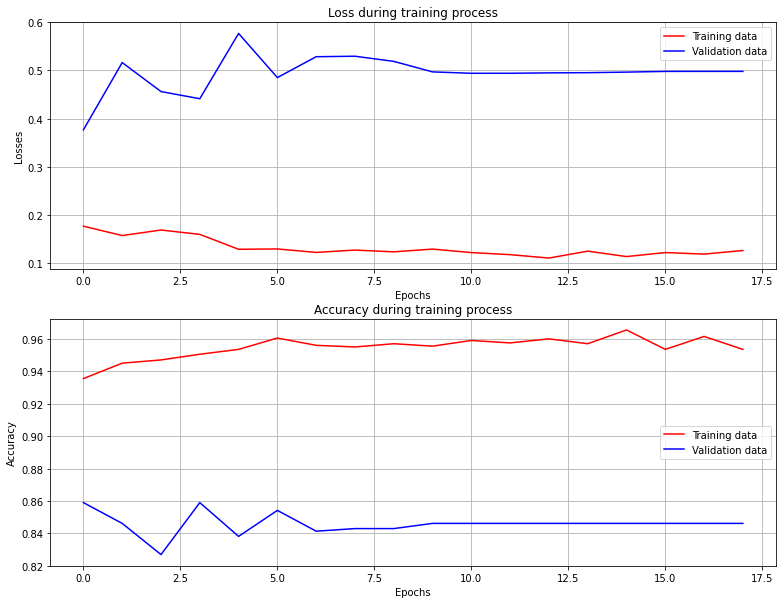

In [62]:
log_history = pd.read_csv(path_to_log_files + r'\log_history\history_open_cv.csv')

fig = plt.figure(figsize=(13, 10))

ax = fig.add_subplot(211)
ax.set_title('Loss during training process')
ax.set_xlabel('Epochs')
ax.set_ylabel('Losses')
ax.grid(True)
ax.plot(log_history['loss'], color='red')
ax.plot(log_history['val_loss'], color='blue')
ax.legend(loc='upper right', labels=['Training data', 'Validation data'])

ax_ = fig.add_subplot(212)
ax_.set_title('Accuracy during training process')
ax_.set_xlabel('Epochs')
ax_.set_ylabel('Accuracy')
ax_.grid(True)
ax_.plot(log_history['accuracy'], color='red')
ax_.plot(log_history['val_accuracy'], color='blue')
ax_.legend(loc='center right', labels=['Training data', 'Validation data'])